In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib import cm
from pprint import pprint

import statsmodels.api as sm
import seaborn as sns
import feature_processing as fp

from sklearn.decomposition import PCA

%matplotlib inline

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('./data/trainset_digitized.csv')

In [3]:
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [4]:
binary_fs = [col for col in features.columns if '_bin' in col]
cat_fs = [col for col in features.columns if '_cat' in col]
bin_cat_fs = binary_fs + cat_fs

ordinal_fs = [col for col in features.columns 
              if col not in bin_cat_fs]

bins_cats = features[bin_cat_fs]
ordinals= features[ordinal_fs]

## Test Association/Independence with the class labels

<b>Binary and Categorical Features</b>

In [5]:
significance_level = 0.05
bincat_association_table = pd.DataFrame()
bincat_associated_fs = []
bincat_independent_fs = []

for i, feature in enumerate(bin_cat_fs):
    table = sm.stats.Table.from_data(pd.concat([bins_cats.loc[:, feature], target], axis=1))
    rslt = table.test_nominal_association()
    pval = rslt.pvalue
    bincat_association_table.loc[0, feature] = pval
    if pval < significance_level:
        text = '  NOT  independent'
        bincat_associated_fs.append(feature)
    else:
        text = 'likely independent'
        bincat_independent_fs.append(feature)
    print('%s is %s (p-value=%.3f)' % (feature, text, pval))

print('# of Bin and Cat Features %3d' % len(bin_cat_fs))
print('# of Associated  Features %3d' % len(bincat_associated_fs))
print('# of Independent Features %3d' % len(bincat_independent_fs))

ps_calc_15_bin is likely independent (p-value=0.705)
ps_calc_16_bin is likely independent (p-value=0.630)
ps_calc_17_bin is likely independent (p-value=0.896)
ps_calc_18_bin is likely independent (p-value=0.670)
ps_calc_19_bin is likely independent (p-value=0.179)
ps_calc_20_bin is likely independent (p-value=0.408)
ps_ind_06_bin is   NOT  independent (p-value=0.000)
ps_ind_07_bin is   NOT  independent (p-value=0.000)
ps_ind_08_bin is   NOT  independent (p-value=0.000)
ps_ind_09_bin is   NOT  independent (p-value=0.000)
ps_ind_10_bin is likely independent (p-value=0.161)
ps_ind_11_bin is likely independent (p-value=0.118)
ps_ind_12_bin is   NOT  independent (p-value=0.000)
ps_ind_13_bin is likely independent (p-value=0.058)
ps_ind_16_bin is   NOT  independent (p-value=0.000)
ps_ind_17_bin is   NOT  independent (p-value=0.000)
ps_ind_18_bin is   NOT  independent (p-value=0.000)
ps_car_01_cat_NaN is   NOT  independent (p-value=0.000)
ps_car_01_cat_0 is   NOT  independent (p-value=0.002)


ps_car_11_cat_72 is   NOT  independent (p-value=0.000)
ps_car_11_cat_73 is likely independent (p-value=0.929)
ps_car_11_cat_74 is   NOT  independent (p-value=0.026)
ps_car_11_cat_75 is   NOT  independent (p-value=0.000)
ps_car_11_cat_76 is likely independent (p-value=0.531)
ps_car_11_cat_77 is likely independent (p-value=0.404)
ps_car_11_cat_78 is likely independent (p-value=0.295)
ps_car_11_cat_79 is   NOT  independent (p-value=0.043)
ps_car_11_cat_80 is likely independent (p-value=0.204)
ps_car_11_cat_81 is likely independent (p-value=0.339)
ps_car_11_cat_82 is   NOT  independent (p-value=0.000)
ps_car_11_cat_83 is likely independent (p-value=0.161)
ps_car_11_cat_84 is   NOT  independent (p-value=0.013)
ps_car_11_cat_85 is   NOT  independent (p-value=0.049)
ps_car_11_cat_86 is likely independent (p-value=0.311)
ps_car_11_cat_87 is   NOT  independent (p-value=0.001)
ps_car_11_cat_88 is   NOT  independent (p-value=0.011)
ps_car_11_cat_89 is   NOT  independent (p-value=0.000)
ps_car_11_

In [6]:
bins_cats[bincat_associated_fs].to_csv('./data/class_associated_bincat_features.csv', index=False)

<b>Ordinal and Digitized Continuous Features</b>

In [7]:
significance_level = 0.05
ordinal_association_table = pd.DataFrame()
ordinal_associated_fs = []
ordinal_independent_fs = []

for i, feature in enumerate(ordinal_fs):
    table = sm.stats.Table.from_data(pd.concat([ordinals.loc[:, feature], target], axis=1))
    rslt = table.test_ordinal_association()
    pval = rslt.pvalue
    ordinal_association_table.loc[0, feature] = pval
    if pval < significance_level:
        text = '  NOT  independent'
        ordinal_associated_fs.append(feature)
    else:
        text = 'likely independent'
        ordinal_independent_fs.append(feature)
    print('%s is %s (p-value=%.3f)' % (feature, text, pval))

print('# of   Ordinal   Features %3d' % len(ordinal_fs))
print('# of Associated  Features %3d' % len(ordinal_associated_fs))
print('# of Independent Features %3d' % len(ordinal_independent_fs))

ps_calc_01 is likely independent (p-value=0.169)
ps_calc_02 is likely independent (p-value=0.294)
ps_calc_03 is likely independent (p-value=0.141)
ps_calc_04 is likely independent (p-value=0.980)
ps_calc_05 is likely independent (p-value=0.552)
ps_calc_06 is likely independent (p-value=0.994)
ps_calc_07 is likely independent (p-value=0.936)
ps_calc_08 is likely independent (p-value=0.407)
ps_calc_09 is likely independent (p-value=0.579)
ps_calc_10 is likely independent (p-value=0.350)
ps_calc_11 is likely independent (p-value=0.691)
ps_calc_12 is likely independent (p-value=0.442)
ps_calc_13 is likely independent (p-value=0.731)
ps_calc_14 is likely independent (p-value=0.245)
ps_car_11 is likely independent (p-value=0.336)
ps_car_12 is   NOT  independent (p-value=0.000)
ps_car_13 is   NOT  independent (p-value=0.000)
ps_car_14 is   NOT  independent (p-value=0.000)
ps_car_15 is   NOT  independent (p-value=0.000)
ps_ind_01 is   NOT  independent (p-value=0.000)
ps_ind_03 is   NOT  indepe

In [8]:
ordinals[ordinal_associated_fs].to_csv('./data/class_associated_ordinal_features.csv', index=False)

## Pairwise indepencence among features associated with classes identified above

In [7]:
associated_features = bincat_associated_fs + ordinal_associated_fs
print('Total # of Digitized Features = %d' % (len(features.columns)))
print('     # of Associated Features = %d' % (len(associated_features)))

Total # of Digitized Features = 227
     # of Associated Features = 143


<b>Binary and Categorical Features</b>

In [8]:
significance_level = 0.05
bincats_associated = bins_cats[bincat_associated_fs]
num_bincat_associated_fs = len(bincat_associated_fs)
feature_assoc_table1 = np.zeros((num_bincat_associated_fs, num_bincat_associated_fs))

for i in range(num_bincat_associated_fs-1):
    for j in range(i+1, num_bincat_associated_fs):
        table = sm.stats.Table.from_data(bincats_associated.iloc[:, [i, j]])
        rslt = table.test_nominal_association()
        pval = rslt.pvalue
        if pval < significance_level:
            text = '  NOT  independent'
        else:
            text = 'Likely independent'
        print('(%2d, %2d) %s (p-value=%.3f)' % (i, j, text, pval))
        feature_assoc_table1[i, j] = pval
        feature_assoc_table1[j, i] = pval
feature_assoc_table1 = pd.DataFrame(feature_assoc_table1, columns=bincat_associated_fs, index=bincat_associated_fs)

( 0,  1)   NOT  independent (p-value=0.000)
( 0,  2)   NOT  independent (p-value=0.000)
( 0,  3)   NOT  independent (p-value=0.000)
( 0,  4)   NOT  independent (p-value=0.000)
( 0,  5)   NOT  independent (p-value=0.000)
( 0,  6)   NOT  independent (p-value=0.000)
( 0,  7)   NOT  independent (p-value=0.000)
( 0,  8)   NOT  independent (p-value=0.000)
( 0,  9)   NOT  independent (p-value=0.000)
( 0, 10) Likely independent (p-value=0.463)
( 0, 11)   NOT  independent (p-value=0.000)
( 0, 12)   NOT  independent (p-value=0.000)
( 0, 13)   NOT  independent (p-value=0.000)
( 0, 14)   NOT  independent (p-value=0.000)
( 0, 15)   NOT  independent (p-value=0.000)
( 0, 16)   NOT  independent (p-value=0.000)
( 0, 17)   NOT  independent (p-value=0.000)
( 0, 18)   NOT  independent (p-value=0.000)
( 0, 19)   NOT  independent (p-value=0.000)
( 0, 20)   NOT  independent (p-value=0.000)
( 0, 21)   NOT  independent (p-value=0.000)
( 0, 22)   NOT  independent (p-value=0.000)
( 0, 23)   NOT  independent (p-v

( 1, 60)   NOT  independent (p-value=0.000)
( 1, 61) Likely independent (p-value=0.275)
( 1, 62)   NOT  independent (p-value=0.000)
( 1, 63)   NOT  independent (p-value=0.000)
( 1, 64)   NOT  independent (p-value=0.000)
( 1, 65)   NOT  independent (p-value=0.000)
( 1, 66)   NOT  independent (p-value=0.000)
( 1, 67)   NOT  independent (p-value=0.000)
( 1, 68) Likely independent (p-value=0.066)
( 1, 69)   NOT  independent (p-value=0.000)
( 1, 70)   NOT  independent (p-value=0.000)
( 1, 71)   NOT  independent (p-value=0.000)
( 1, 72)   NOT  independent (p-value=0.000)
( 1, 73)   NOT  independent (p-value=0.000)
( 1, 74)   NOT  independent (p-value=0.000)
( 1, 75)   NOT  independent (p-value=0.000)
( 1, 76)   NOT  independent (p-value=0.000)
( 1, 77)   NOT  independent (p-value=0.000)
( 1, 78)   NOT  independent (p-value=0.000)
( 1, 79)   NOT  independent (p-value=0.000)
( 1, 80)   NOT  independent (p-value=0.000)
( 1, 81)   NOT  independent (p-value=0.000)
( 1, 82)   NOT  independent (p-v

( 2, 120)   NOT  independent (p-value=0.000)
( 2, 121)   NOT  independent (p-value=0.000)
( 2, 122)   NOT  independent (p-value=0.000)
( 2, 123)   NOT  independent (p-value=0.000)
( 2, 124)   NOT  independent (p-value=0.000)
( 2, 125) Likely independent (p-value=0.650)
( 2, 126)   NOT  independent (p-value=0.000)
( 2, 127)   NOT  independent (p-value=0.000)
( 2, 128)   NOT  independent (p-value=0.000)
( 2, 129)   NOT  independent (p-value=0.000)
( 2, 130)   NOT  independent (p-value=0.002)
( 2, 131)   NOT  independent (p-value=0.000)
( 3,  4)   NOT  independent (p-value=0.000)
( 3,  5)   NOT  independent (p-value=0.000)
( 3,  6)   NOT  independent (p-value=0.000)
( 3,  7)   NOT  independent (p-value=0.000)
( 3,  8) Likely independent (p-value=0.430)
( 3,  9)   NOT  independent (p-value=0.000)
( 3, 10)   NOT  independent (p-value=0.004)
( 3, 11)   NOT  independent (p-value=0.000)
( 3, 12)   NOT  independent (p-value=0.000)
( 3, 13)   NOT  independent (p-value=0.000)
( 3, 14)   NOT  inde

( 4, 55) Likely independent (p-value=0.115)
( 4, 56)   NOT  independent (p-value=0.000)
( 4, 57)   NOT  independent (p-value=0.000)
( 4, 58) Likely independent (p-value=0.921)
( 4, 59) Likely independent (p-value=0.722)
( 4, 60)   NOT  independent (p-value=0.040)
( 4, 61)   NOT  independent (p-value=0.007)
( 4, 62) Likely independent (p-value=0.615)
( 4, 63) Likely independent (p-value=0.394)
( 4, 64) Likely independent (p-value=0.622)
( 4, 65) Likely independent (p-value=0.089)
( 4, 66) Likely independent (p-value=0.557)
( 4, 67)   NOT  independent (p-value=0.003)
( 4, 68)   NOT  independent (p-value=0.000)
( 4, 69)   NOT  independent (p-value=0.000)
( 4, 70) Likely independent (p-value=0.078)
( 4, 71)   NOT  independent (p-value=0.000)
( 4, 72)   NOT  independent (p-value=0.000)
( 4, 73) Likely independent (p-value=0.800)
( 4, 74)   NOT  independent (p-value=0.026)
( 4, 75) Likely independent (p-value=0.852)
( 4, 76)   NOT  independent (p-value=0.001)
( 4, 77) Likely independent (p-v

( 5, 115)   NOT  independent (p-value=0.000)
( 5, 116)   NOT  independent (p-value=0.000)
( 5, 117)   NOT  independent (p-value=0.000)
( 5, 118)   NOT  independent (p-value=0.000)
( 5, 119)   NOT  independent (p-value=0.000)
( 5, 120)   NOT  independent (p-value=0.000)
( 5, 121)   NOT  independent (p-value=0.000)
( 5, 122)   NOT  independent (p-value=0.000)
( 5, 123)   NOT  independent (p-value=0.000)
( 5, 124) Likely independent (p-value=0.545)
( 5, 125) Likely independent (p-value=0.466)
( 5, 126)   NOT  independent (p-value=0.000)
( 5, 127)   NOT  independent (p-value=0.000)
( 5, 128)   NOT  independent (p-value=0.000)
( 5, 129)   NOT  independent (p-value=0.000)
( 5, 130)   NOT  independent (p-value=0.000)
( 5, 131)   NOT  independent (p-value=0.001)
( 6,  7)   NOT  independent (p-value=0.000)
( 6,  8)   NOT  independent (p-value=0.000)
( 6,  9)   NOT  independent (p-value=0.000)
( 6, 10)   NOT  independent (p-value=0.000)
( 6, 11)   NOT  independent (p-value=0.000)
( 6, 12)   NOT 

( 7, 55)   NOT  independent (p-value=0.044)
( 7, 56)   NOT  independent (p-value=0.000)
( 7, 57)   NOT  independent (p-value=0.000)
( 7, 58)   NOT  independent (p-value=0.000)
( 7, 59)   NOT  independent (p-value=0.000)
( 7, 60)   NOT  independent (p-value=0.000)
( 7, 61)   NOT  independent (p-value=0.000)
( 7, 62)   NOT  independent (p-value=0.001)
( 7, 63)   NOT  independent (p-value=0.000)
( 7, 64)   NOT  independent (p-value=0.000)
( 7, 65)   NOT  independent (p-value=0.046)
( 7, 66) Likely independent (p-value=0.119)
( 7, 67)   NOT  independent (p-value=0.000)
( 7, 68)   NOT  independent (p-value=0.000)
( 7, 69)   NOT  independent (p-value=0.000)
( 7, 70)   NOT  independent (p-value=0.007)
( 7, 71)   NOT  independent (p-value=0.000)
( 7, 72)   NOT  independent (p-value=0.000)
( 7, 73)   NOT  independent (p-value=0.000)
( 7, 74)   NOT  independent (p-value=0.000)
( 7, 75)   NOT  independent (p-value=0.010)
( 7, 76) Likely independent (p-value=0.108)
( 7, 77)   NOT  independent (p-v

( 8, 121)   NOT  independent (p-value=0.000)
( 8, 122)   NOT  independent (p-value=0.000)
( 8, 123)   NOT  independent (p-value=0.000)
( 8, 124)   NOT  independent (p-value=0.000)
( 8, 125)   NOT  independent (p-value=0.000)
( 8, 126) Likely independent (p-value=0.408)
( 8, 127) Likely independent (p-value=0.774)
( 8, 128) Likely independent (p-value=0.413)
( 8, 129) Likely independent (p-value=0.199)
( 8, 130) Likely independent (p-value=0.713)
( 8, 131) Likely independent (p-value=0.152)
( 9, 10)   NOT  independent (p-value=0.000)
( 9, 11)   NOT  independent (p-value=0.000)
( 9, 12)   NOT  independent (p-value=0.000)
( 9, 13)   NOT  independent (p-value=0.000)
( 9, 14)   NOT  independent (p-value=0.000)
( 9, 15)   NOT  independent (p-value=0.000)
( 9, 16)   NOT  independent (p-value=0.000)
( 9, 17)   NOT  independent (p-value=0.000)
( 9, 18)   NOT  independent (p-value=0.000)
( 9, 19)   NOT  independent (p-value=0.000)
( 9, 20)   NOT  independent (p-value=0.000)
( 9, 21)   NOT  indep

(10, 64) Likely independent (p-value=0.361)
(10, 65) Likely independent (p-value=0.509)
(10, 66) Likely independent (p-value=0.189)
(10, 67) Likely independent (p-value=0.438)
(10, 68) Likely independent (p-value=0.093)
(10, 69) Likely independent (p-value=0.197)
(10, 70) Likely independent (p-value=0.207)
(10, 71)   NOT  independent (p-value=0.021)
(10, 72) Likely independent (p-value=0.678)
(10, 73) Likely independent (p-value=0.268)
(10, 74) Likely independent (p-value=0.583)
(10, 75) Likely independent (p-value=0.054)
(10, 76) Likely independent (p-value=0.959)
(10, 77) Likely independent (p-value=0.528)
(10, 78)   NOT  independent (p-value=0.019)
(10, 79) Likely independent (p-value=0.317)
(10, 80) Likely independent (p-value=0.885)
(10, 81) Likely independent (p-value=0.168)
(10, 82) Likely independent (p-value=0.387)
(10, 83) Likely independent (p-value=0.080)
(10, 84) Likely independent (p-value=0.818)
(10, 85) Likely independent (p-value=0.155)
(10, 86) Likely independent (p-v

(12, 16)   NOT  independent (p-value=0.000)
(12, 17)   NOT  independent (p-value=0.000)
(12, 18)   NOT  independent (p-value=0.000)
(12, 19)   NOT  independent (p-value=0.000)
(12, 20)   NOT  independent (p-value=0.000)
(12, 21)   NOT  independent (p-value=0.000)
(12, 22)   NOT  independent (p-value=0.000)
(12, 23)   NOT  independent (p-value=0.000)
(12, 24)   NOT  independent (p-value=0.000)
(12, 25)   NOT  independent (p-value=0.000)
(12, 26)   NOT  independent (p-value=0.029)
(12, 27)   NOT  independent (p-value=0.001)
(12, 28)   NOT  independent (p-value=0.000)
(12, 29)   NOT  independent (p-value=0.004)
(12, 30) Likely independent (p-value=0.747)
(12, 31)   NOT  independent (p-value=0.000)
(12, 32)   NOT  independent (p-value=0.000)
(12, 33)   NOT  independent (p-value=0.000)
(12, 34)   NOT  independent (p-value=0.000)
(12, 35)   NOT  independent (p-value=0.000)
(12, 36)   NOT  independent (p-value=0.000)
(12, 37)   NOT  independent (p-value=0.000)
(12, 38)   NOT  independent (p-v

(13, 87) Likely independent (p-value=0.080)
(13, 88) Likely independent (p-value=0.104)
(13, 89) Likely independent (p-value=0.204)
(13, 90)   NOT  independent (p-value=0.000)
(13, 91)   NOT  independent (p-value=0.001)
(13, 92)   NOT  independent (p-value=0.000)
(13, 93)   NOT  independent (p-value=0.000)
(13, 94)   NOT  independent (p-value=0.000)
(13, 95)   NOT  independent (p-value=0.000)
(13, 96)   NOT  independent (p-value=0.000)
(13, 97)   NOT  independent (p-value=0.010)
(13, 98)   NOT  independent (p-value=0.002)
(13, 99)   NOT  independent (p-value=0.000)
(13, 100)   NOT  independent (p-value=0.000)
(13, 101)   NOT  independent (p-value=0.000)
(13, 102)   NOT  independent (p-value=0.000)
(13, 103)   NOT  independent (p-value=0.040)
(13, 104)   NOT  independent (p-value=0.000)
(13, 105) Likely independent (p-value=0.434)
(13, 106) Likely independent (p-value=0.377)
(13, 107) Likely independent (p-value=0.155)
(13, 108)   NOT  independent (p-value=0.000)
(13, 109)   NOT  indepe

(15, 43)   NOT  independent (p-value=0.000)
(15, 44)   NOT  independent (p-value=0.003)
(15, 45)   NOT  independent (p-value=0.000)
(15, 46) Likely independent (p-value=0.289)
(15, 47)   NOT  independent (p-value=0.000)
(15, 48)   NOT  independent (p-value=0.031)
(15, 49) Likely independent (p-value=0.270)
(15, 50)   NOT  independent (p-value=0.000)
(15, 51)   NOT  independent (p-value=0.000)
(15, 52)   NOT  independent (p-value=0.000)
(15, 53)   NOT  independent (p-value=0.000)
(15, 54)   NOT  independent (p-value=0.000)
(15, 55)   NOT  independent (p-value=0.005)
(15, 56)   NOT  independent (p-value=0.000)
(15, 57)   NOT  independent (p-value=0.000)
(15, 58)   NOT  independent (p-value=0.000)
(15, 59)   NOT  independent (p-value=0.000)
(15, 60)   NOT  independent (p-value=0.000)
(15, 61)   NOT  independent (p-value=0.000)
(15, 62)   NOT  independent (p-value=0.005)
(15, 63) Likely independent (p-value=0.102)
(15, 64)   NOT  independent (p-value=0.001)
(15, 65)   NOT  independent (p-v

(16, 118)   NOT  independent (p-value=0.000)
(16, 119)   NOT  independent (p-value=0.000)
(16, 120)   NOT  independent (p-value=0.000)
(16, 121) Likely independent (p-value=0.155)
(16, 122)   NOT  independent (p-value=0.000)
(16, 123)   NOT  independent (p-value=0.000)
(16, 124)   NOT  independent (p-value=0.000)
(16, 125)   NOT  independent (p-value=0.000)
(16, 126)   NOT  independent (p-value=0.000)
(16, 127)   NOT  independent (p-value=0.000)
(16, 128)   NOT  independent (p-value=0.000)
(16, 129) Likely independent (p-value=0.054)
(16, 130) Likely independent (p-value=0.238)
(16, 131)   NOT  independent (p-value=0.000)
(17, 18)   NOT  independent (p-value=0.000)
(17, 19)   NOT  independent (p-value=0.000)
(17, 20)   NOT  independent (p-value=0.000)
(17, 21)   NOT  independent (p-value=0.000)
(17, 22)   NOT  independent (p-value=0.000)
(17, 23)   NOT  independent (p-value=0.000)
(17, 24)   NOT  independent (p-value=0.000)
(17, 25)   NOT  independent (p-value=0.000)
(17, 26)   NOT  in

(18, 80)   NOT  independent (p-value=0.000)
(18, 81)   NOT  independent (p-value=0.000)
(18, 82)   NOT  independent (p-value=0.000)
(18, 83)   NOT  independent (p-value=0.000)
(18, 84)   NOT  independent (p-value=0.000)
(18, 85)   NOT  independent (p-value=0.000)
(18, 86)   NOT  independent (p-value=0.000)
(18, 87)   NOT  independent (p-value=0.000)
(18, 88)   NOT  independent (p-value=0.000)
(18, 89)   NOT  independent (p-value=0.000)
(18, 90)   NOT  independent (p-value=0.000)
(18, 91)   NOT  independent (p-value=0.000)
(18, 92)   NOT  independent (p-value=0.000)
(18, 93)   NOT  independent (p-value=0.000)
(18, 94)   NOT  independent (p-value=0.000)
(18, 95)   NOT  independent (p-value=0.000)
(18, 96)   NOT  independent (p-value=0.000)
(18, 97)   NOT  independent (p-value=0.000)
(18, 98)   NOT  independent (p-value=0.000)
(18, 99)   NOT  independent (p-value=0.000)
(18, 100)   NOT  independent (p-value=0.000)
(18, 101)   NOT  independent (p-value=0.000)
(18, 102)   NOT  independent (

(20, 46)   NOT  independent (p-value=0.000)
(20, 47)   NOT  independent (p-value=0.000)
(20, 48)   NOT  independent (p-value=0.000)
(20, 49)   NOT  independent (p-value=0.000)
(20, 50)   NOT  independent (p-value=0.000)
(20, 51)   NOT  independent (p-value=0.000)
(20, 52)   NOT  independent (p-value=0.000)
(20, 53)   NOT  independent (p-value=0.000)
(20, 54)   NOT  independent (p-value=0.000)
(20, 55)   NOT  independent (p-value=0.000)
(20, 56)   NOT  independent (p-value=0.000)
(20, 57)   NOT  independent (p-value=0.000)
(20, 58)   NOT  independent (p-value=0.000)
(20, 59)   NOT  independent (p-value=0.006)
(20, 60)   NOT  independent (p-value=0.001)
(20, 61)   NOT  independent (p-value=0.000)
(20, 62)   NOT  independent (p-value=0.000)
(20, 63)   NOT  independent (p-value=0.000)
(20, 64)   NOT  independent (p-value=0.000)
(20, 65)   NOT  independent (p-value=0.000)
(20, 66)   NOT  independent (p-value=0.000)
(20, 67)   NOT  independent (p-value=0.000)
(20, 68)   NOT  independent (p-v

(21, 125)   NOT  independent (p-value=0.000)
(21, 126)   NOT  independent (p-value=0.000)
(21, 127) Likely independent (p-value=0.635)
(21, 128)   NOT  independent (p-value=0.000)
(21, 129)   NOT  independent (p-value=0.000)
(21, 130)   NOT  independent (p-value=0.000)
(21, 131)   NOT  independent (p-value=0.000)
(22, 23)   NOT  independent (p-value=0.000)
(22, 24)   NOT  independent (p-value=0.000)
(22, 25)   NOT  independent (p-value=0.000)
(22, 26)   NOT  independent (p-value=0.000)
(22, 27)   NOT  independent (p-value=0.000)
(22, 28)   NOT  independent (p-value=0.032)
(22, 29) Likely independent (p-value=0.852)
(22, 30)   NOT  independent (p-value=0.000)
(22, 31)   NOT  independent (p-value=0.000)
(22, 32)   NOT  independent (p-value=0.000)
(22, 33)   NOT  independent (p-value=0.000)
(22, 34)   NOT  independent (p-value=0.000)
(22, 35)   NOT  independent (p-value=0.000)
(22, 36)   NOT  independent (p-value=0.000)
(22, 37)   NOT  independent (p-value=0.000)
(22, 38) Likely independe

(23, 97)   NOT  independent (p-value=0.000)
(23, 98)   NOT  independent (p-value=0.000)
(23, 99)   NOT  independent (p-value=0.000)
(23, 100)   NOT  independent (p-value=0.000)
(23, 101)   NOT  independent (p-value=0.000)
(23, 102)   NOT  independent (p-value=0.000)
(23, 103)   NOT  independent (p-value=0.000)
(23, 104)   NOT  independent (p-value=0.000)
(23, 105)   NOT  independent (p-value=0.000)
(23, 106)   NOT  independent (p-value=0.000)
(23, 107)   NOT  independent (p-value=0.000)
(23, 108)   NOT  independent (p-value=0.000)
(23, 109)   NOT  independent (p-value=0.000)
(23, 110)   NOT  independent (p-value=0.000)
(23, 111)   NOT  independent (p-value=0.000)
(23, 112)   NOT  independent (p-value=0.000)
(23, 113)   NOT  independent (p-value=0.000)
(23, 114)   NOT  independent (p-value=0.000)
(23, 115)   NOT  independent (p-value=0.000)
(23, 116)   NOT  independent (p-value=0.000)
(23, 117)   NOT  independent (p-value=0.000)
(23, 118)   NOT  independent (p-value=0.000)
(23, 119)   N

(25, 73)   NOT  independent (p-value=0.000)
(25, 74)   NOT  independent (p-value=0.000)
(25, 75)   NOT  independent (p-value=0.000)
(25, 76)   NOT  independent (p-value=0.000)
(25, 77)   NOT  independent (p-value=0.000)
(25, 78)   NOT  independent (p-value=0.000)
(25, 79)   NOT  independent (p-value=0.000)
(25, 80)   NOT  independent (p-value=0.000)
(25, 81)   NOT  independent (p-value=0.000)
(25, 82)   NOT  independent (p-value=0.000)
(25, 83)   NOT  independent (p-value=0.000)
(25, 84)   NOT  independent (p-value=0.000)
(25, 85)   NOT  independent (p-value=0.000)
(25, 86)   NOT  independent (p-value=0.000)
(25, 87)   NOT  independent (p-value=0.000)
(25, 88)   NOT  independent (p-value=0.000)
(25, 89)   NOT  independent (p-value=0.000)
(25, 90)   NOT  independent (p-value=0.000)
(25, 91)   NOT  independent (p-value=0.000)
(25, 92)   NOT  independent (p-value=0.000)
(25, 93)   NOT  independent (p-value=0.000)
(25, 94)   NOT  independent (p-value=0.000)
(25, 95)   NOT  independent (p-v

(27, 53)   NOT  independent (p-value=0.000)
(27, 54)   NOT  independent (p-value=0.000)
(27, 55)   NOT  independent (p-value=0.040)
(27, 56)   NOT  independent (p-value=0.000)
(27, 57)   NOT  independent (p-value=0.000)
(27, 58)   NOT  independent (p-value=0.032)
(27, 59) Likely independent (p-value=0.155)
(27, 60) Likely independent (p-value=0.424)
(27, 61)   NOT  independent (p-value=0.001)
(27, 62)   NOT  independent (p-value=0.039)
(27, 63) Likely independent (p-value=0.282)
(27, 64)   NOT  independent (p-value=0.007)
(27, 65)   NOT  independent (p-value=0.022)
(27, 66) Likely independent (p-value=0.144)
(27, 67)   NOT  independent (p-value=0.019)
(27, 68) Likely independent (p-value=0.101)
(27, 69) Likely independent (p-value=0.552)
(27, 70) Likely independent (p-value=0.052)
(27, 71) Likely independent (p-value=0.246)
(27, 72)   NOT  independent (p-value=0.001)
(27, 73)   NOT  independent (p-value=0.001)
(27, 74) Likely independent (p-value=0.372)
(27, 75) Likely independent (p-v

(29, 37) Likely independent (p-value=0.843)
(29, 38)   NOT  independent (p-value=0.017)
(29, 39) Likely independent (p-value=0.767)
(29, 40) Likely independent (p-value=0.771)
(29, 41) Likely independent (p-value=0.069)
(29, 42)   NOT  independent (p-value=0.007)
(29, 43)   NOT  independent (p-value=0.000)
(29, 44) Likely independent (p-value=0.935)
(29, 45) Likely independent (p-value=0.421)
(29, 46) Likely independent (p-value=0.603)
(29, 47)   NOT  independent (p-value=0.000)
(29, 48) Likely independent (p-value=0.946)
(29, 49)   NOT  independent (p-value=0.000)
(29, 50) Likely independent (p-value=0.299)
(29, 51)   NOT  independent (p-value=0.000)
(29, 52)   NOT  independent (p-value=0.000)
(29, 53) Likely independent (p-value=0.131)
(29, 54) Likely independent (p-value=0.131)
(29, 55) Likely independent (p-value=0.317)
(29, 56)   NOT  independent (p-value=0.000)
(29, 57) Likely independent (p-value=0.098)
(29, 58) Likely independent (p-value=0.096)
(29, 59) Likely independent (p-v

(30, 125)   NOT  independent (p-value=0.000)
(30, 126) Likely independent (p-value=0.546)
(30, 127) Likely independent (p-value=0.813)
(30, 128) Likely independent (p-value=0.720)
(30, 129)   NOT  independent (p-value=0.000)
(30, 130)   NOT  independent (p-value=0.000)
(30, 131)   NOT  independent (p-value=0.000)
(31, 32)   NOT  independent (p-value=0.000)
(31, 33)   NOT  independent (p-value=0.000)
(31, 34)   NOT  independent (p-value=0.000)
(31, 35)   NOT  independent (p-value=0.000)
(31, 36)   NOT  independent (p-value=0.000)
(31, 37)   NOT  independent (p-value=0.000)
(31, 38)   NOT  independent (p-value=0.000)
(31, 39)   NOT  independent (p-value=0.031)
(31, 40)   NOT  independent (p-value=0.000)
(31, 41)   NOT  independent (p-value=0.000)
(31, 42)   NOT  independent (p-value=0.000)
(31, 43)   NOT  independent (p-value=0.000)
(31, 44)   NOT  independent (p-value=0.000)
(31, 45)   NOT  independent (p-value=0.000)
(31, 46)   NOT  independent (p-value=0.000)
(31, 47)   NOT  independe

(32, 115)   NOT  independent (p-value=0.000)
(32, 116)   NOT  independent (p-value=0.000)
(32, 117)   NOT  independent (p-value=0.000)
(32, 118)   NOT  independent (p-value=0.000)
(32, 119)   NOT  independent (p-value=0.000)
(32, 120)   NOT  independent (p-value=0.000)
(32, 121)   NOT  independent (p-value=0.000)
(32, 122)   NOT  independent (p-value=0.000)
(32, 123)   NOT  independent (p-value=0.000)
(32, 124)   NOT  independent (p-value=0.000)
(32, 125)   NOT  independent (p-value=0.021)
(32, 126)   NOT  independent (p-value=0.000)
(32, 127)   NOT  independent (p-value=0.006)
(32, 128)   NOT  independent (p-value=0.000)
(32, 129)   NOT  independent (p-value=0.000)
(32, 130)   NOT  independent (p-value=0.000)
(32, 131)   NOT  independent (p-value=0.000)
(33, 34)   NOT  independent (p-value=0.000)
(33, 35)   NOT  independent (p-value=0.000)
(33, 36)   NOT  independent (p-value=0.000)
(33, 37)   NOT  independent (p-value=0.000)
(33, 38)   NOT  independent (p-value=0.000)
(33, 39) Likely

(34, 108) Likely independent (p-value=0.105)
(34, 109)   NOT  independent (p-value=0.000)
(34, 110)   NOT  independent (p-value=0.000)
(34, 111)   NOT  independent (p-value=0.000)
(34, 112)   NOT  independent (p-value=0.004)
(34, 113) Likely independent (p-value=0.063)
(34, 114)   NOT  independent (p-value=0.000)
(34, 115)   NOT  independent (p-value=0.000)
(34, 116)   NOT  independent (p-value=0.000)
(34, 117)   NOT  independent (p-value=0.000)
(34, 118)   NOT  independent (p-value=0.000)
(34, 119)   NOT  independent (p-value=0.000)
(34, 120)   NOT  independent (p-value=0.000)
(34, 121)   NOT  independent (p-value=0.000)
(34, 122)   NOT  independent (p-value=0.000)
(34, 123)   NOT  independent (p-value=0.000)
(34, 124)   NOT  independent (p-value=0.000)
(34, 125) Likely independent (p-value=0.492)
(34, 126)   NOT  independent (p-value=0.000)
(34, 127) Likely independent (p-value=0.457)
(34, 128)   NOT  independent (p-value=0.000)
(34, 129) Likely independent (p-value=0.104)
(34, 130) 

(36, 108)   NOT  independent (p-value=0.000)
(36, 109)   NOT  independent (p-value=0.000)
(36, 110)   NOT  independent (p-value=0.000)
(36, 111)   NOT  independent (p-value=0.000)
(36, 112)   NOT  independent (p-value=0.000)
(36, 113)   NOT  independent (p-value=0.000)
(36, 114)   NOT  independent (p-value=0.000)
(36, 115)   NOT  independent (p-value=0.000)
(36, 116)   NOT  independent (p-value=0.000)
(36, 117) Likely independent (p-value=0.390)
(36, 118)   NOT  independent (p-value=0.013)
(36, 119) Likely independent (p-value=0.261)
(36, 120)   NOT  independent (p-value=0.000)
(36, 121) Likely independent (p-value=0.217)
(36, 122) Likely independent (p-value=0.058)
(36, 123) Likely independent (p-value=0.054)
(36, 124) Likely independent (p-value=0.067)
(36, 125) Likely independent (p-value=0.057)
(36, 126) Likely independent (p-value=0.373)
(36, 127) Likely independent (p-value=0.761)
(36, 128) Likely independent (p-value=0.607)
(36, 129) Likely independent (p-value=0.902)
(36, 130) 

(38, 111)   NOT  independent (p-value=0.000)
(38, 112)   NOT  independent (p-value=0.000)
(38, 113)   NOT  independent (p-value=0.000)
(38, 114)   NOT  independent (p-value=0.000)
(38, 115)   NOT  independent (p-value=0.000)
(38, 116)   NOT  independent (p-value=0.000)
(38, 117) Likely independent (p-value=0.482)
(38, 118)   NOT  independent (p-value=0.000)
(38, 119) Likely independent (p-value=0.078)
(38, 120) Likely independent (p-value=0.439)
(38, 121) Likely independent (p-value=0.190)
(38, 122)   NOT  independent (p-value=0.000)
(38, 123)   NOT  independent (p-value=0.000)
(38, 124)   NOT  independent (p-value=0.001)
(38, 125)   NOT  independent (p-value=0.000)
(38, 126) Likely independent (p-value=0.089)
(38, 127)   NOT  independent (p-value=0.000)
(38, 128) Likely independent (p-value=0.753)
(38, 129) Likely independent (p-value=0.450)
(38, 130) Likely independent (p-value=0.977)
(38, 131)   NOT  independent (p-value=0.000)
(39, 40) Likely independent (p-value=0.120)
(39, 41)   

(40, 115)   NOT  independent (p-value=0.000)
(40, 116)   NOT  independent (p-value=0.000)
(40, 117)   NOT  independent (p-value=0.037)
(40, 118)   NOT  independent (p-value=0.000)
(40, 119)   NOT  independent (p-value=0.000)
(40, 120)   NOT  independent (p-value=0.004)
(40, 121)   NOT  independent (p-value=0.000)
(40, 122)   NOT  independent (p-value=0.000)
(40, 123)   NOT  independent (p-value=0.000)
(40, 124)   NOT  independent (p-value=0.035)
(40, 125) Likely independent (p-value=0.071)
(40, 126) Likely independent (p-value=0.460)
(40, 127) Likely independent (p-value=0.327)
(40, 128)   NOT  independent (p-value=0.031)
(40, 129)   NOT  independent (p-value=0.003)
(40, 130) Likely independent (p-value=0.964)
(40, 131) Likely independent (p-value=0.145)
(41, 42)   NOT  independent (p-value=0.000)
(41, 43)   NOT  independent (p-value=0.000)
(41, 44)   NOT  independent (p-value=0.000)
(41, 45)   NOT  independent (p-value=0.000)
(41, 46)   NOT  independent (p-value=0.000)
(41, 47)   NOT 

(42, 125)   NOT  independent (p-value=0.000)
(42, 126) Likely independent (p-value=0.734)
(42, 127)   NOT  independent (p-value=0.012)
(42, 128) Likely independent (p-value=0.055)
(42, 129)   NOT  independent (p-value=0.000)
(42, 130) Likely independent (p-value=0.155)
(42, 131)   NOT  independent (p-value=0.000)
(43, 44)   NOT  independent (p-value=0.000)
(43, 45)   NOT  independent (p-value=0.000)
(43, 46)   NOT  independent (p-value=0.000)
(43, 47)   NOT  independent (p-value=0.000)
(43, 48)   NOT  independent (p-value=0.000)
(43, 49)   NOT  independent (p-value=0.000)
(43, 50)   NOT  independent (p-value=0.000)
(43, 51) Likely independent (p-value=0.857)
(43, 52)   NOT  independent (p-value=0.000)
(43, 53)   NOT  independent (p-value=0.000)
(43, 54)   NOT  independent (p-value=0.000)
(43, 55)   NOT  independent (p-value=0.000)
(43, 56)   NOT  independent (p-value=0.000)
(43, 57)   NOT  independent (p-value=0.000)
(43, 58) Likely independent (p-value=0.322)
(43, 59)   NOT  independe

(45, 51)   NOT  independent (p-value=0.000)
(45, 52)   NOT  independent (p-value=0.000)
(45, 53)   NOT  independent (p-value=0.000)
(45, 54)   NOT  independent (p-value=0.000)
(45, 55)   NOT  independent (p-value=0.000)
(45, 56)   NOT  independent (p-value=0.000)
(45, 57)   NOT  independent (p-value=0.000)
(45, 58)   NOT  independent (p-value=0.000)
(45, 59)   NOT  independent (p-value=0.000)
(45, 60)   NOT  independent (p-value=0.000)
(45, 61)   NOT  independent (p-value=0.000)
(45, 62)   NOT  independent (p-value=0.000)
(45, 63)   NOT  independent (p-value=0.000)
(45, 64)   NOT  independent (p-value=0.000)
(45, 65)   NOT  independent (p-value=0.000)
(45, 66)   NOT  independent (p-value=0.000)
(45, 67)   NOT  independent (p-value=0.000)
(45, 68)   NOT  independent (p-value=0.000)
(45, 69)   NOT  independent (p-value=0.000)
(45, 70)   NOT  independent (p-value=0.000)
(45, 71)   NOT  independent (p-value=0.000)
(45, 72)   NOT  independent (p-value=0.000)
(45, 73)   NOT  independent (p-v

(47, 70)   NOT  independent (p-value=0.000)
(47, 71)   NOT  independent (p-value=0.000)
(47, 72)   NOT  independent (p-value=0.000)
(47, 73)   NOT  independent (p-value=0.000)
(47, 74)   NOT  independent (p-value=0.000)
(47, 75)   NOT  independent (p-value=0.000)
(47, 76)   NOT  independent (p-value=0.000)
(47, 77)   NOT  independent (p-value=0.000)
(47, 78)   NOT  independent (p-value=0.000)
(47, 79)   NOT  independent (p-value=0.000)
(47, 80)   NOT  independent (p-value=0.000)
(47, 81)   NOT  independent (p-value=0.000)
(47, 82)   NOT  independent (p-value=0.000)
(47, 83)   NOT  independent (p-value=0.000)
(47, 84)   NOT  independent (p-value=0.000)
(47, 85)   NOT  independent (p-value=0.000)
(47, 86)   NOT  independent (p-value=0.000)
(47, 87)   NOT  independent (p-value=0.000)
(47, 88)   NOT  independent (p-value=0.000)
(47, 89)   NOT  independent (p-value=0.000)
(47, 90)   NOT  independent (p-value=0.000)
(47, 91)   NOT  independent (p-value=0.000)
(47, 92)   NOT  independent (p-v

(49, 96)   NOT  independent (p-value=0.000)
(49, 97)   NOT  independent (p-value=0.000)
(49, 98)   NOT  independent (p-value=0.000)
(49, 99)   NOT  independent (p-value=0.000)
(49, 100)   NOT  independent (p-value=0.000)
(49, 101)   NOT  independent (p-value=0.000)
(49, 102)   NOT  independent (p-value=0.000)
(49, 103)   NOT  independent (p-value=0.000)
(49, 104)   NOT  independent (p-value=0.000)
(49, 105)   NOT  independent (p-value=0.000)
(49, 106)   NOT  independent (p-value=0.000)
(49, 107)   NOT  independent (p-value=0.000)
(49, 108)   NOT  independent (p-value=0.000)
(49, 109)   NOT  independent (p-value=0.000)
(49, 110)   NOT  independent (p-value=0.000)
(49, 111)   NOT  independent (p-value=0.000)
(49, 112)   NOT  independent (p-value=0.001)
(49, 113)   NOT  independent (p-value=0.000)
(49, 114)   NOT  independent (p-value=0.000)
(49, 115)   NOT  independent (p-value=0.000)
(49, 116)   NOT  independent (p-value=0.000)
(49, 117) Likely independent (p-value=0.364)
(49, 118)   NO

(51, 121) Likely independent (p-value=0.059)
(51, 122)   NOT  independent (p-value=0.000)
(51, 123)   NOT  independent (p-value=0.000)
(51, 124)   NOT  independent (p-value=0.000)
(51, 125)   NOT  independent (p-value=0.000)
(51, 126)   NOT  independent (p-value=0.000)
(51, 127) Likely independent (p-value=0.783)
(51, 128)   NOT  independent (p-value=0.000)
(51, 129)   NOT  independent (p-value=0.000)
(51, 130) Likely independent (p-value=0.170)
(51, 131)   NOT  independent (p-value=0.007)
(52, 53)   NOT  independent (p-value=0.000)
(52, 54)   NOT  independent (p-value=0.000)
(52, 55)   NOT  independent (p-value=0.000)
(52, 56)   NOT  independent (p-value=0.000)
(52, 57)   NOT  independent (p-value=0.000)
(52, 58)   NOT  independent (p-value=0.000)
(52, 59)   NOT  independent (p-value=0.000)
(52, 60)   NOT  independent (p-value=0.000)
(52, 61)   NOT  independent (p-value=0.000)
(52, 62)   NOT  independent (p-value=0.000)
(52, 63) Likely independent (p-value=0.724)
(52, 64)   NOT  indep

(54, 74)   NOT  independent (p-value=0.000)
(54, 75) Likely independent (p-value=0.792)
(54, 76)   NOT  independent (p-value=0.000)
(54, 77)   NOT  independent (p-value=0.000)
(54, 78) Likely independent (p-value=0.145)
(54, 79)   NOT  independent (p-value=0.000)
(54, 80)   NOT  independent (p-value=0.000)
(54, 81)   NOT  independent (p-value=0.000)
(54, 82)   NOT  independent (p-value=0.000)
(54, 83)   NOT  independent (p-value=0.000)
(54, 84)   NOT  independent (p-value=0.000)
(54, 85)   NOT  independent (p-value=0.000)
(54, 86)   NOT  independent (p-value=0.000)
(54, 87)   NOT  independent (p-value=0.003)
(54, 88)   NOT  independent (p-value=0.000)
(54, 89)   NOT  independent (p-value=0.000)
(54, 90)   NOT  independent (p-value=0.000)
(54, 91)   NOT  independent (p-value=0.000)
(54, 92)   NOT  independent (p-value=0.000)
(54, 93)   NOT  independent (p-value=0.000)
(54, 94)   NOT  independent (p-value=0.000)
(54, 95)   NOT  independent (p-value=0.000)
(54, 96)   NOT  independent (p-v

(56, 108) Likely independent (p-value=0.171)
(56, 109)   NOT  independent (p-value=0.000)
(56, 110)   NOT  independent (p-value=0.000)
(56, 111) Likely independent (p-value=0.426)
(56, 112)   NOT  independent (p-value=0.001)
(56, 113)   NOT  independent (p-value=0.000)
(56, 114)   NOT  independent (p-value=0.000)
(56, 115)   NOT  independent (p-value=0.000)
(56, 116)   NOT  independent (p-value=0.000)
(56, 117)   NOT  independent (p-value=0.000)
(56, 118)   NOT  independent (p-value=0.000)
(56, 119)   NOT  independent (p-value=0.000)
(56, 120)   NOT  independent (p-value=0.000)
(56, 121)   NOT  independent (p-value=0.000)
(56, 122)   NOT  independent (p-value=0.000)
(56, 123)   NOT  independent (p-value=0.000)
(56, 124)   NOT  independent (p-value=0.000)
(56, 125)   NOT  independent (p-value=0.000)
(56, 126)   NOT  independent (p-value=0.000)
(56, 127)   NOT  independent (p-value=0.000)
(56, 128)   NOT  independent (p-value=0.000)
(56, 129) Likely independent (p-value=0.555)
(56, 130) 

(59, 79)   NOT  independent (p-value=0.000)
(59, 80)   NOT  independent (p-value=0.000)
(59, 81)   NOT  independent (p-value=0.000)
(59, 82)   NOT  independent (p-value=0.000)
(59, 83)   NOT  independent (p-value=0.000)
(59, 84)   NOT  independent (p-value=0.000)
(59, 85)   NOT  independent (p-value=0.015)
(59, 86)   NOT  independent (p-value=0.000)
(59, 87)   NOT  independent (p-value=0.008)
(59, 88)   NOT  independent (p-value=0.000)
(59, 89)   NOT  independent (p-value=0.000)
(59, 90)   NOT  independent (p-value=0.000)
(59, 91)   NOT  independent (p-value=0.026)
(59, 92)   NOT  independent (p-value=0.000)
(59, 93)   NOT  independent (p-value=0.000)
(59, 94)   NOT  independent (p-value=0.000)
(59, 95)   NOT  independent (p-value=0.000)
(59, 96)   NOT  independent (p-value=0.003)
(59, 97)   NOT  independent (p-value=0.001)
(59, 98)   NOT  independent (p-value=0.000)
(59, 99)   NOT  independent (p-value=0.000)
(59, 100)   NOT  independent (p-value=0.004)
(59, 101)   NOT  independent (p

(61, 129)   NOT  independent (p-value=0.017)
(61, 130) Likely independent (p-value=0.207)
(61, 131)   NOT  independent (p-value=0.000)
(62, 63)   NOT  independent (p-value=0.000)
(62, 64)   NOT  independent (p-value=0.000)
(62, 65)   NOT  independent (p-value=0.000)
(62, 66)   NOT  independent (p-value=0.000)
(62, 67)   NOT  independent (p-value=0.000)
(62, 68)   NOT  independent (p-value=0.000)
(62, 69)   NOT  independent (p-value=0.001)
(62, 70)   NOT  independent (p-value=0.000)
(62, 71)   NOT  independent (p-value=0.000)
(62, 72)   NOT  independent (p-value=0.000)
(62, 73)   NOT  independent (p-value=0.000)
(62, 74)   NOT  independent (p-value=0.000)
(62, 75)   NOT  independent (p-value=0.000)
(62, 76)   NOT  independent (p-value=0.000)
(62, 77)   NOT  independent (p-value=0.000)
(62, 78)   NOT  independent (p-value=0.000)
(62, 79)   NOT  independent (p-value=0.000)
(62, 80)   NOT  independent (p-value=0.000)
(62, 81)   NOT  independent (p-value=0.000)
(62, 82)   NOT  independent (

(64, 111)   NOT  independent (p-value=0.000)
(64, 112)   NOT  independent (p-value=0.000)
(64, 113)   NOT  independent (p-value=0.000)
(64, 114)   NOT  independent (p-value=0.000)
(64, 115)   NOT  independent (p-value=0.000)
(64, 116)   NOT  independent (p-value=0.000)
(64, 117) Likely independent (p-value=0.508)
(64, 118)   NOT  independent (p-value=0.000)
(64, 119)   NOT  independent (p-value=0.000)
(64, 120) Likely independent (p-value=0.525)
(64, 121) Likely independent (p-value=0.506)
(64, 122)   NOT  independent (p-value=0.000)
(64, 123)   NOT  independent (p-value=0.000)
(64, 124)   NOT  independent (p-value=0.000)
(64, 125)   NOT  independent (p-value=0.009)
(64, 126) Likely independent (p-value=0.082)
(64, 127) Likely independent (p-value=0.759)
(64, 128) Likely independent (p-value=0.222)
(64, 129)   NOT  independent (p-value=0.015)
(64, 130) Likely independent (p-value=0.163)
(64, 131) Likely independent (p-value=0.236)
(65, 66)   NOT  independent (p-value=0.000)
(65, 67)   

(67, 107)   NOT  independent (p-value=0.000)
(67, 108)   NOT  independent (p-value=0.000)
(67, 109)   NOT  independent (p-value=0.000)
(67, 110)   NOT  independent (p-value=0.000)
(67, 111)   NOT  independent (p-value=0.000)
(67, 112)   NOT  independent (p-value=0.000)
(67, 113)   NOT  independent (p-value=0.000)
(67, 114)   NOT  independent (p-value=0.000)
(67, 115)   NOT  independent (p-value=0.000)
(67, 116)   NOT  independent (p-value=0.000)
(67, 117) Likely independent (p-value=0.330)
(67, 118)   NOT  independent (p-value=0.000)
(67, 119)   NOT  independent (p-value=0.000)
(67, 120) Likely independent (p-value=0.096)
(67, 121) Likely independent (p-value=0.621)
(67, 122)   NOT  independent (p-value=0.000)
(67, 123)   NOT  independent (p-value=0.000)
(67, 124)   NOT  independent (p-value=0.000)
(67, 125)   NOT  independent (p-value=0.000)
(67, 126) Likely independent (p-value=0.262)
(67, 127) Likely independent (p-value=0.802)
(67, 128) Likely independent (p-value=0.542)
(67, 129) 

(70, 111)   NOT  independent (p-value=0.000)
(70, 112)   NOT  independent (p-value=0.001)
(70, 113)   NOT  independent (p-value=0.000)
(70, 114)   NOT  independent (p-value=0.000)
(70, 115)   NOT  independent (p-value=0.000)
(70, 116)   NOT  independent (p-value=0.000)
(70, 117) Likely independent (p-value=0.317)
(70, 118)   NOT  independent (p-value=0.000)
(70, 119)   NOT  independent (p-value=0.000)
(70, 120) Likely independent (p-value=0.235)
(70, 121) Likely independent (p-value=0.795)
(70, 122)   NOT  independent (p-value=0.030)
(70, 123)   NOT  independent (p-value=0.028)
(70, 124)   NOT  independent (p-value=0.000)
(70, 125)   NOT  independent (p-value=0.000)
(70, 126) Likely independent (p-value=0.354)
(70, 127)   NOT  independent (p-value=0.031)
(70, 128) Likely independent (p-value=0.253)
(70, 129) Likely independent (p-value=0.052)
(70, 130) Likely independent (p-value=0.057)
(70, 131)   NOT  independent (p-value=0.006)
(71, 72)   NOT  independent (p-value=0.000)
(71, 73)   

(73, 122)   NOT  independent (p-value=0.000)
(73, 123)   NOT  independent (p-value=0.000)
(73, 124) Likely independent (p-value=0.094)
(73, 125) Likely independent (p-value=0.631)
(73, 126)   NOT  independent (p-value=0.000)
(73, 127) Likely independent (p-value=0.354)
(73, 128)   NOT  independent (p-value=0.005)
(73, 129) Likely independent (p-value=0.149)
(73, 130)   NOT  independent (p-value=0.042)
(73, 131)   NOT  independent (p-value=0.000)
(74, 75)   NOT  independent (p-value=0.000)
(74, 76)   NOT  independent (p-value=0.000)
(74, 77)   NOT  independent (p-value=0.000)
(74, 78)   NOT  independent (p-value=0.003)
(74, 79)   NOT  independent (p-value=0.000)
(74, 80)   NOT  independent (p-value=0.003)
(74, 81)   NOT  independent (p-value=0.000)
(74, 82)   NOT  independent (p-value=0.000)
(74, 83)   NOT  independent (p-value=0.000)
(74, 84)   NOT  independent (p-value=0.001)
(74, 85) Likely independent (p-value=0.088)
(74, 86)   NOT  independent (p-value=0.001)
(74, 87) Likely indepe

(77, 84)   NOT  independent (p-value=0.000)
(77, 85)   NOT  independent (p-value=0.000)
(77, 86)   NOT  independent (p-value=0.000)
(77, 87)   NOT  independent (p-value=0.000)
(77, 88)   NOT  independent (p-value=0.000)
(77, 89)   NOT  independent (p-value=0.000)
(77, 90)   NOT  independent (p-value=0.000)
(77, 91)   NOT  independent (p-value=0.000)
(77, 92)   NOT  independent (p-value=0.000)
(77, 93)   NOT  independent (p-value=0.000)
(77, 94)   NOT  independent (p-value=0.000)
(77, 95)   NOT  independent (p-value=0.000)
(77, 96)   NOT  independent (p-value=0.000)
(77, 97)   NOT  independent (p-value=0.000)
(77, 98)   NOT  independent (p-value=0.000)
(77, 99)   NOT  independent (p-value=0.000)
(77, 100)   NOT  independent (p-value=0.000)
(77, 101)   NOT  independent (p-value=0.000)
(77, 102)   NOT  independent (p-value=0.000)
(77, 103)   NOT  independent (p-value=0.000)
(77, 104)   NOT  independent (p-value=0.000)
(77, 105)   NOT  independent (p-value=0.000)
(77, 106)   NOT  independe

(80, 113)   NOT  independent (p-value=0.000)
(80, 114)   NOT  independent (p-value=0.000)
(80, 115)   NOT  independent (p-value=0.000)
(80, 116)   NOT  independent (p-value=0.000)
(80, 117)   NOT  independent (p-value=0.010)
(80, 118)   NOT  independent (p-value=0.002)
(80, 119)   NOT  independent (p-value=0.003)
(80, 120)   NOT  independent (p-value=0.017)
(80, 121) Likely independent (p-value=0.962)
(80, 122)   NOT  independent (p-value=0.000)
(80, 123)   NOT  independent (p-value=0.000)
(80, 124) Likely independent (p-value=0.141)
(80, 125)   NOT  independent (p-value=0.007)
(80, 126) Likely independent (p-value=0.094)
(80, 127) Likely independent (p-value=0.719)
(80, 128) Likely independent (p-value=0.056)
(80, 129) Likely independent (p-value=0.617)
(80, 130) Likely independent (p-value=0.293)
(80, 131)   NOT  independent (p-value=0.000)
(81, 82)   NOT  independent (p-value=0.000)
(81, 83)   NOT  independent (p-value=0.000)
(81, 84)   NOT  independent (p-value=0.000)
(81, 85)   NO

(84, 106)   NOT  independent (p-value=0.000)
(84, 107)   NOT  independent (p-value=0.000)
(84, 108)   NOT  independent (p-value=0.000)
(84, 109)   NOT  independent (p-value=0.000)
(84, 110)   NOT  independent (p-value=0.000)
(84, 111)   NOT  independent (p-value=0.000)
(84, 112)   NOT  independent (p-value=0.002)
(84, 113)   NOT  independent (p-value=0.000)
(84, 114)   NOT  independent (p-value=0.000)
(84, 115)   NOT  independent (p-value=0.000)
(84, 116)   NOT  independent (p-value=0.000)
(84, 117) Likely independent (p-value=0.400)
(84, 118)   NOT  independent (p-value=0.000)
(84, 119)   NOT  independent (p-value=0.000)
(84, 120)   NOT  independent (p-value=0.001)
(84, 121) Likely independent (p-value=0.900)
(84, 122)   NOT  independent (p-value=0.000)
(84, 123)   NOT  independent (p-value=0.000)
(84, 124)   NOT  independent (p-value=0.000)
(84, 125)   NOT  independent (p-value=0.000)
(84, 126) Likely independent (p-value=0.301)
(84, 127) Likely independent (p-value=0.383)
(84, 128) 

(88, 112)   NOT  independent (p-value=0.000)
(88, 113)   NOT  independent (p-value=0.000)
(88, 114)   NOT  independent (p-value=0.000)
(88, 115)   NOT  independent (p-value=0.000)
(88, 116)   NOT  independent (p-value=0.000)
(88, 117) Likely independent (p-value=0.261)
(88, 118)   NOT  independent (p-value=0.000)
(88, 119)   NOT  independent (p-value=0.000)
(88, 120)   NOT  independent (p-value=0.006)
(88, 121) Likely independent (p-value=0.552)
(88, 122)   NOT  independent (p-value=0.000)
(88, 123)   NOT  independent (p-value=0.000)
(88, 124)   NOT  independent (p-value=0.000)
(88, 125)   NOT  independent (p-value=0.040)
(88, 126)   NOT  independent (p-value=0.001)
(88, 127) Likely independent (p-value=0.076)
(88, 128)   NOT  independent (p-value=0.000)
(88, 129)   NOT  independent (p-value=0.000)
(88, 130)   NOT  independent (p-value=0.005)
(88, 131)   NOT  independent (p-value=0.000)
(89, 90)   NOT  independent (p-value=0.000)
(89, 91)   NOT  independent (p-value=0.037)
(89, 92)   N

(93, 99)   NOT  independent (p-value=0.000)
(93, 100)   NOT  independent (p-value=0.000)
(93, 101)   NOT  independent (p-value=0.000)
(93, 102)   NOT  independent (p-value=0.000)
(93, 103)   NOT  independent (p-value=0.000)
(93, 104)   NOT  independent (p-value=0.000)
(93, 105)   NOT  independent (p-value=0.000)
(93, 106)   NOT  independent (p-value=0.000)
(93, 107)   NOT  independent (p-value=0.000)
(93, 108)   NOT  independent (p-value=0.000)
(93, 109)   NOT  independent (p-value=0.000)
(93, 110)   NOT  independent (p-value=0.000)
(93, 111)   NOT  independent (p-value=0.000)
(93, 112)   NOT  independent (p-value=0.000)
(93, 113)   NOT  independent (p-value=0.000)
(93, 114)   NOT  independent (p-value=0.000)
(93, 115)   NOT  independent (p-value=0.000)
(93, 116)   NOT  independent (p-value=0.000)
(93, 117) Likely independent (p-value=0.300)
(93, 118)   NOT  independent (p-value=0.008)
(93, 119) Likely independent (p-value=0.253)
(93, 120)   NOT  independent (p-value=0.000)
(93, 121) L

(98, 112)   NOT  independent (p-value=0.012)
(98, 113)   NOT  independent (p-value=0.000)
(98, 114)   NOT  independent (p-value=0.000)
(98, 115)   NOT  independent (p-value=0.000)
(98, 116)   NOT  independent (p-value=0.000)
(98, 117) Likely independent (p-value=0.591)
(98, 118)   NOT  independent (p-value=0.000)
(98, 119)   NOT  independent (p-value=0.000)
(98, 120) Likely independent (p-value=0.275)
(98, 121) Likely independent (p-value=0.883)
(98, 122)   NOT  independent (p-value=0.000)
(98, 123)   NOT  independent (p-value=0.000)
(98, 124)   NOT  independent (p-value=0.001)
(98, 125) Likely independent (p-value=0.137)
(98, 126) Likely independent (p-value=0.902)
(98, 127)   NOT  independent (p-value=0.002)
(98, 128)   NOT  independent (p-value=0.004)
(98, 129) Likely independent (p-value=0.801)
(98, 130)   NOT  independent (p-value=0.004)
(98, 131) Likely independent (p-value=0.990)
(99, 100)   NOT  independent (p-value=0.000)
(99, 101)   NOT  independent (p-value=0.000)
(99, 102) 

(104, 116)   NOT  independent (p-value=0.000)
(104, 117) Likely independent (p-value=0.232)
(104, 118)   NOT  independent (p-value=0.000)
(104, 119)   NOT  independent (p-value=0.000)
(104, 120) Likely independent (p-value=0.157)
(104, 121) Likely independent (p-value=0.677)
(104, 122)   NOT  independent (p-value=0.000)
(104, 123)   NOT  independent (p-value=0.000)
(104, 124)   NOT  independent (p-value=0.000)
(104, 125) Likely independent (p-value=0.453)
(104, 126)   NOT  independent (p-value=0.004)
(104, 127) Likely independent (p-value=0.205)
(104, 128)   NOT  independent (p-value=0.001)
(104, 129) Likely independent (p-value=0.100)
(104, 130) Likely independent (p-value=0.906)
(104, 131)   NOT  independent (p-value=0.000)
(105, 106)   NOT  independent (p-value=0.000)
(105, 107)   NOT  independent (p-value=0.000)
(105, 108)   NOT  independent (p-value=0.000)
(105, 109)   NOT  independent (p-value=0.000)
(105, 110)   NOT  independent (p-value=0.000)
(105, 111)   NOT  independent (p-v

(112, 116)   NOT  independent (p-value=0.000)
(112, 117) Likely independent (p-value=0.529)
(112, 118)   NOT  independent (p-value=0.000)
(112, 119)   NOT  independent (p-value=0.000)
(112, 120) Likely independent (p-value=0.101)
(112, 121) Likely independent (p-value=0.525)
(112, 122)   NOT  independent (p-value=0.000)
(112, 123)   NOT  independent (p-value=0.000)
(112, 124)   NOT  independent (p-value=0.025)
(112, 125)   NOT  independent (p-value=0.002)
(112, 126) Likely independent (p-value=0.868)
(112, 127) Likely independent (p-value=0.267)
(112, 128) Likely independent (p-value=0.574)
(112, 129)   NOT  independent (p-value=0.000)
(112, 130) Likely independent (p-value=0.583)
(112, 131) Likely independent (p-value=0.357)
(113, 114)   NOT  independent (p-value=0.000)
(113, 115)   NOT  independent (p-value=0.000)
(113, 116)   NOT  independent (p-value=0.000)
(113, 117) Likely independent (p-value=0.761)
(113, 118)   NOT  independent (p-value=0.000)
(113, 119)   NOT  independent (p-v

(127, 131)   NOT  independent (p-value=0.000)
(128, 129)   NOT  independent (p-value=0.000)
(128, 130)   NOT  independent (p-value=0.000)
(128, 131)   NOT  independent (p-value=0.000)
(129, 130)   NOT  independent (p-value=0.000)
(129, 131)   NOT  independent (p-value=0.000)
(130, 131)   NOT  independent (p-value=0.000)


In [9]:
feature_assoc_table1.describe()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_12_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat_NaN,ps_car_01_cat_0,...,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_NaN,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6
count,132.000000,132.000000,1.320000e+02,132.000000,132.000000,1.320000e+02,1.320000e+02,132.000000,132.000000,1.320000e+02,...,1.320000e+02,1.320000e+02,1.320000e+02,132.000000,1.320000e+02,132.000000,1.320000e+02,1.320000e+02,132.000000,1.320000e+02
mean,0.015455,0.038447,2.988651e-02,0.023160,0.176262,6.061661e-02,1.034530e-01,0.121715,0.372074,1.698775e-01,...,4.456438e-02,3.956647e-02,8.180995e-02,0.109268,1.881132e-01,0.295662,2.304454e-01,1.576410e-01,0.260322,1.459943e-01
std,0.081240,0.158575,1.428742e-01,0.119709,0.283655,1.843111e-01,2.441345e-01,0.248716,0.360567,2.529933e-01,...,1.617481e-01,1.542982e-01,1.910857e-01,0.210139,2.747426e-01,0.328868,2.815308e-01,2.675351e-01,0.317360,2.537882e-01
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000512,4.996004e-16,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.855446e-09,0.001376,6.139256e-13,4.771212e-08,0.000300,1.031584e-08
50%,0.000000,0.000000,0.000000e+00,0.000000,0.002747,3.251382e-08,1.448304e-10,0.000002,0.265885,1.015483e-02,...,0.000000e+00,0.000000e+00,4.346048e-07,0.000006,3.748111e-02,0.161503,5.536462e-02,3.976033e-03,0.094803,6.498212e-03
75%,0.000000,0.000000,2.982725e-12,0.000000,0.258317,2.004896e-03,1.423973e-02,0.077229,0.713882,2.935304e-01,...,2.238939e-10,4.861546e-10,2.979860e-02,0.060586,3.080752e-01,0.590271,4.490976e-01,2.031075e-01,0.521181,1.531384e-01
max,0.553230,0.912357,9.505127e-01,0.967395,0.998507,9.257560e-01,9.750698e-01,0.954412,0.989350,9.450624e-01,...,9.066638e-01,8.920571e-01,9.551437e-01,0.870332,9.572889e-01,0.984301,8.885930e-01,9.529230e-01,0.985301,9.895134e-01


Heatmap for the independence/association test among binary features.
The higher the p-value, the higher the independence.


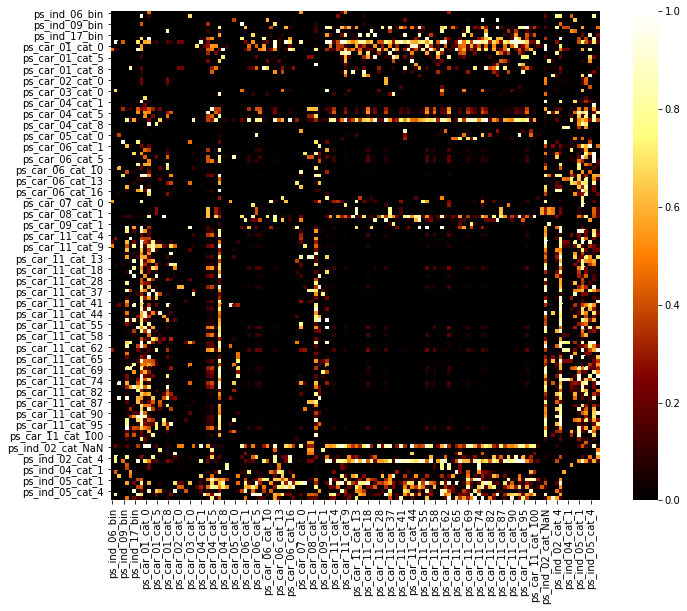

In [10]:
plt.figure(figsize=(12,9))
sns.heatmap(feature_assoc_table1, linewidths=0.0,vmax=1.0, square=True, 
            cmap=cm.afmhot, linecolor='white', annot=False)
print('Heatmap for the independence/association test among binary features.')
print('The higher the p-value, the higher the independence.')

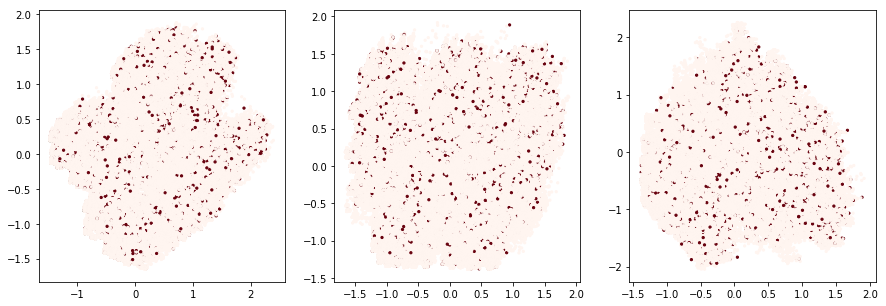

In [11]:
X1 = np.array(bincats_associated)

pca1 = PCA()
Xpca1 = pca1.fit_transform(X1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(Xpca1[:, 0], Xpca1[:, 1], s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax2.scatter(Xpca1[:, 1], Xpca1[:, 2], s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax3.scatter(Xpca1[:, 2], Xpca1[:, 3], s=5, c=target, cmap=cm.Reds)# alpha=0.3)

Cumulative Ratio to Component 0: 0.102
Cumulative Ratio to Component10: 0.594
Cumulative Ratio to Component20: 0.803
Cumulative Ratio to Component30: 0.879
Cumulative Ratio to Component40: 0.922
Cumulative Ratio to Component50: 0.946
Cumulative Ratio to Component60: 0.961
Cumulative Ratio to Component70: 0.974
Cumulative Ratio to Component80: 0.983
Cumulative Ratio to Component90: 0.990


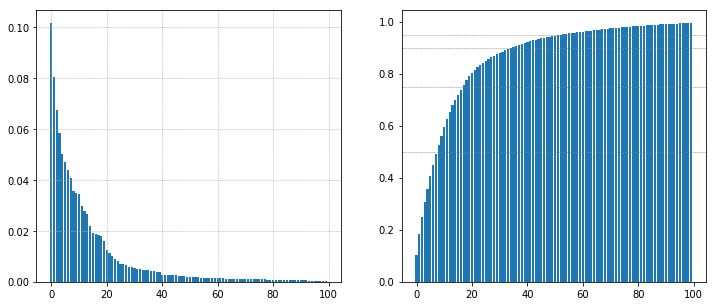

In [41]:
cumu_variance_ratio = []
cumu_ratio = 0
num = len(pca1.explained_variance_ratio_) 
for i in range(num):
    cumu_ratio += pca1.explained_variance_ratio_[i]
    cumu_variance_ratio.append(cumu_ratio)

num_to_plot=100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(num_to_plot), pca1.explained_variance_ratio_[:num_to_plot])
ax1.grid(ls='--', lw=0.5)
ax2.axhline(y=0.95, ls='--', lw=0.5, color='0.5')
ax2.axhline(y=0.9, ls='--', lw=0.5, color='0.5')
ax2.axhline(y=0.75, ls='--', lw=0.5, color='0.5')
ax2.axhline(y=0.5, ls='--', lw=0.5, color='0.5')
ax2.bar(range(num_to_plot), cumu_variance_ratio[:num_to_plot])

i = 0
while cumu_variance_ratio[i] <= 0.99:
    if i % 10 == 0: 
        print('Cumulative Ratio to Component%2d: %.3f' % (i, cumu_variance_ratio[i]))
    i += 1
print('Cumulative Ratio to Component%2d: %.3f' % (i, cumu_variance_ratio[i-1]))

<b>Ordinal and Digitized Continuous Features</b>

In [13]:
significance_level = 0.05
ordinals_associated = ordinals[ordinal_associated_fs]
num_ordinal_associated_fs = len(ordinal_associated_fs)
feature_assoc_table2 = np.zeros((num_ordinal_associated_fs, num_ordinal_associated_fs))

for i in range(num_ordinal_associated_fs-1):
    for j in range(i+1, num_ordinal_associated_fs):
        table = sm.stats.Table.from_data(ordinals_associated.iloc[:, [i, j]])
        rslt = table.test_ordinal_association()
        pval = rslt.pvalue
        if pval < significance_level:
            text = '  NOT  independent'
        else:
            text = 'Likely independent'
        print('(%2d, %2d) %s (p-value=%.3f)' % (i, j, text, pval))
        feature_assoc_table2[i, j] = pval
        feature_assoc_table2[j, i] = pval
feature_assoc_table2 = pd.DataFrame(feature_assoc_table2, columns=ordinal_associated_fs, index=ordinal_associated_fs)

( 0,  1)   NOT  independent (p-value=0.000)
( 0,  2)   NOT  independent (p-value=0.000)
( 0,  3)   NOT  independent (p-value=0.000)
( 0,  4)   NOT  independent (p-value=0.000)
( 0,  5)   NOT  independent (p-value=0.000)
( 0,  6)   NOT  independent (p-value=0.000)
( 0,  7)   NOT  independent (p-value=0.000)
( 0,  8)   NOT  independent (p-value=0.001)
( 0,  9)   NOT  independent (p-value=0.000)
( 0, 10)   NOT  independent (p-value=0.000)
( 1,  2)   NOT  independent (p-value=0.000)
( 1,  3)   NOT  independent (p-value=0.000)
( 1,  4)   NOT  independent (p-value=0.000)
( 1,  5)   NOT  independent (p-value=0.000)
( 1,  6)   NOT  independent (p-value=0.000)
( 1,  7)   NOT  independent (p-value=0.000)
( 1,  8)   NOT  independent (p-value=0.000)
( 1,  9)   NOT  independent (p-value=0.000)
( 1, 10)   NOT  independent (p-value=0.000)
( 2,  3)   NOT  independent (p-value=0.000)
( 2,  4)   NOT  independent (p-value=0.000)
( 2,  5)   NOT  independent (p-value=0.000)
( 2,  6) Likely independent (p-v

In [18]:
feature_assoc_table2.describe()

,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,8.518440e-05,1.659511e-88,4.980737e-03,3.751372e-03,2.166723e-25,8.330732e-03,1.501585e-02,1.367319e-04,2.109042e-03,3.684515e-17,1.135976e-04
std,2.825247e-04,5.503975e-88,1.651924e-02,9.360021e-03,7.186207e-25,2.356066e-02,2.758441e-02,4.534884e-04,4.572929e-03,1.222015e-16,3.767606e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.405787e-79,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,9.589562e-131,4.011355e-218,0.000000e+00,2.072960e-300,7.805433e-26,8.251245e-191,1.825462e-87,0.000000e+00,4.410327e-189
75%,6.011591e-64,4.125623e-191,2.552483e-56,7.520254e-04,8.108809e-132,2.552483e-56,1.602133e-02,1.468170e-105,4.685142e-04,3.324408e-113,5.138476e-129
max,9.370284e-04,1.825462e-87,5.478811e-02,3.079309e-02,2.383395e-24,7.834357e-02,7.834357e-02,1.504051e-03,1.329449e-02,4.052966e-16,1.249573e-03


Heatmap for the independence/association test among binary features.
The higher the p-value, the higher the independence.


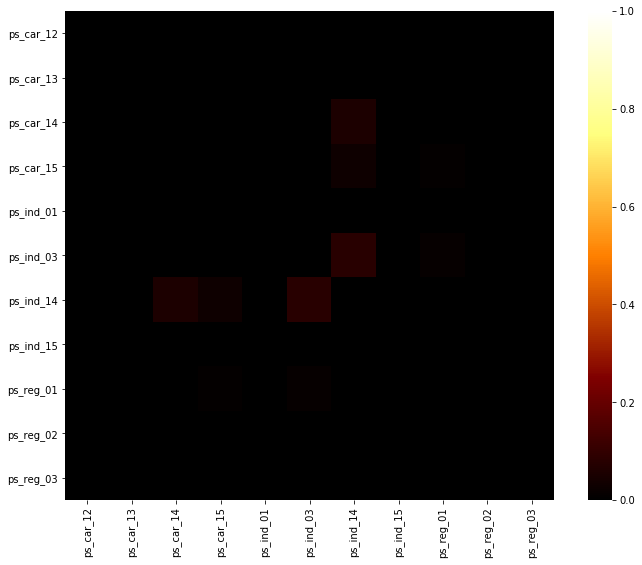

In [19]:
plt.figure(figsize=(12,9))
sns.heatmap(feature_assoc_table2, linewidths=0.0,vmax=1.0, square=True, 
            cmap=cm.afmhot, linecolor='white', annot=False)
print('Heatmap for the independence/association test among binary features.')
print('The higher the p-value, the higher the independence.')

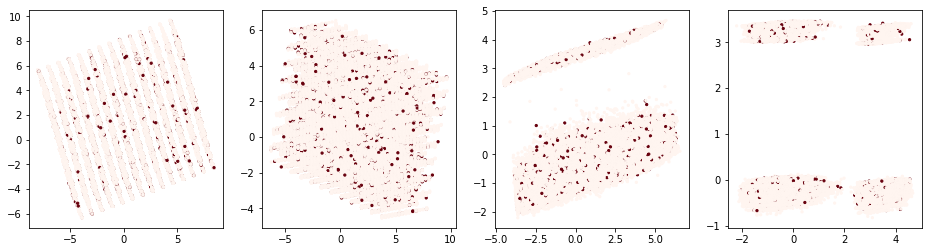

In [43]:
X2 = np.array(ordinals_associated)

pca2 = PCA()
Xpca2 = pca2.fit_transform(X2)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.scatter(Xpca2[:, 0], Xpca2[:, 1], s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax2.scatter(Xpca2[:, 1], Xpca2[:, 2], s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax3.scatter(Xpca2[:, 2], Xpca2[:, 3], s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax4.scatter(Xpca2[:, 3], Xpca2[:, 4], s=5, c=target, cmap=cm.Reds)# alpha=0.3)

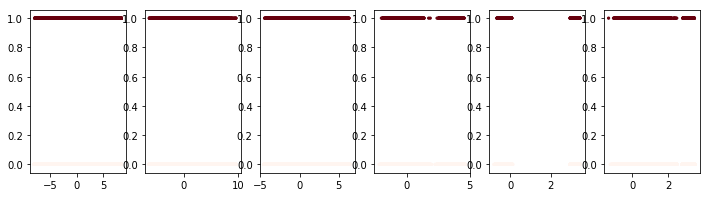

In [45]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(12, 3))
ax1.scatter(Xpca2[:, 0], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax2.scatter(Xpca2[:, 1], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax3.scatter(Xpca2[:, 2], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax4.scatter(Xpca2[:, 3], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax5.scatter(Xpca2[:, 4], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax6.scatter(Xpca2[:, 5], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)

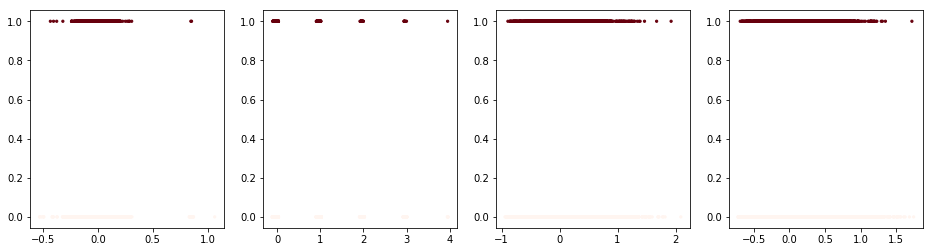

In [47]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.scatter(Xpca2[:, -1], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax2.scatter(Xpca2[:, -2], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax3.scatter(Xpca2[:, -3], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)
ax4.scatter(Xpca2[:, -4], target, s=5, c=target, cmap=cm.Reds)# alpha=0.3)

Cumulative Ratio to Component 0: 0.468
Cumulative Ratio to Component 1: 0.720
Cumulative Ratio to Component 2: 0.847
Cumulative Ratio to Component 3: 0.941
Cumulative Ratio to Component 4: 0.971
Cumulative Ratio to Component 5: 0.991
Cumulative Ratio to Component 6: 0.997
Cumulative Ratio to Component 7: 0.998
Cumulative Ratio to Component 8: 0.999
Cumulative Ratio to Component 9: 1.000
Cumulative Ratio to Component10: 1.000


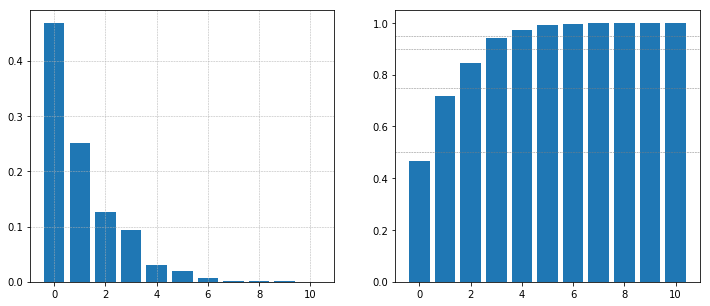

In [35]:
cumu_variance_ratio = []
cumu_ratio = 0
num = len(pca2.explained_variance_ratio_) 
for i in range(num):
    cumu_ratio += pca2.explained_variance_ratio_[i]
    cumu_variance_ratio.append(cumu_ratio)

num_to_plot=num
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(num_to_plot), pca2.explained_variance_ratio_[:num_to_plot])
ax1.grid(ls='--', lw=0.5)
ax2.axhline(y=0.95, ls='--', lw=0.5, color='0.5')
ax2.axhline(y=0.9, ls='--', lw=0.5, color='0.5')
ax2.axhline(y=0.75, ls='--', lw=0.5, color='0.5')
ax2.axhline(y=0.5, ls='--', lw=0.5, color='0.5')
ax2.bar(range(num_to_plot), cumu_variance_ratio[:num_to_plot])

for i in range(num):
    print('Cumulative Ratio to Component%2d: %.3f' % (i, cumu_variance_ratio[i]))